# Real numbers, data science and chaos:How to fit any dataset with a single parameter

### Implementation of the Research paper (Mini Project CS356)

**Keywords: Chaotic systems • Machine Learning • Generalization**


  Real world data comes in huge variety of shapes and sizes with modalities ranging from traditional structured
database schemas to unstructured media sources such as video feeds and audio recordings. Nevertheless, any
dataset can ultimately be thought of as a list of numerical values X = [x0, · · · , xn] describing the data content
regardless of the underlying modality. The purpose of this paper is to show that all the samples of any arbitrary
dataset X can be reproduced by a simple differentiable equation:
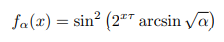

In [1]:
from mpmath import *
import numpy as np
from mpmath import pi as Pi
from mpmath import sin as Sin
from mpmath import asin as Asin
from mpmath import sqrt as Sqrt
from multiprocessing import Pool
from functools import reduce, partial

## Dyadic Function :
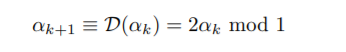

In [2]:
tau = 12

# Decimal to Binary till tau bits precession
# As floating point numbers can be represented using infinity number of binary bits
# Due to device constraints we need to stop at some or the other point let us say tau

def decimalToBinary(decimalInitial, targetBinaryPrecision = 12):
    binary_value = '' # Binary_value to which we will append
    for i in range(targetBinaryPrecision):
        remainder = decimalInitial*2 - ((decimalInitial*2)% 1) # Dyadic Function as each of the state is dependend over the past state
        decimalInitial = decimalInitial * 2 - remainder
        binary_value = binary_value + str(int(remainder))
    return binary_value

# Binary to Decimal 
def binaryToDecimal(binaryValue):
    i = 1
    decimal_value = mp.mpf(0)# To get real floating point numbers which cannot achieved normally
    for binary in binaryValue:
        decimal_value += int(binary)/(2**i)
        i += 1
    return (decimal_value)

# Driver code
np.random.seed(0)

numbDataPoints = 50 # Generating a sample dataset X
xs = np.random.uniform(0, 1, numbDataPoints)# Using numpy to fill random values in it
print('xs = %s' % xs)

xs = [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215 0.97861834 0.79915856 0.46147936 0.78052918
 0.11827443 0.63992102 0.14335329 0.94466892 0.52184832 0.41466194
 0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
 0.61209572 0.616934   0.94374808 0.6818203  0.3595079  0.43703195
 0.6976312  0.06022547 0.66676672 0.67063787 0.21038256 0.1289263
 0.31542835 0.36371077]


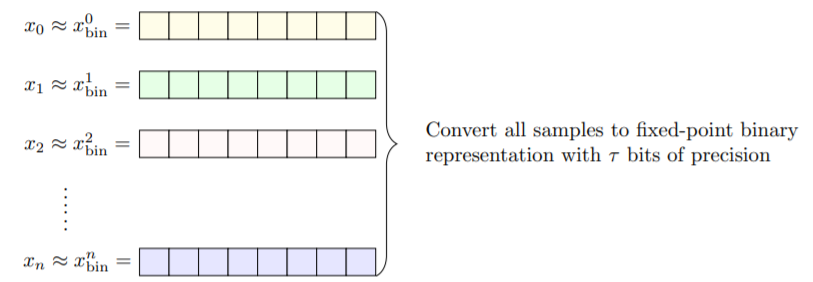

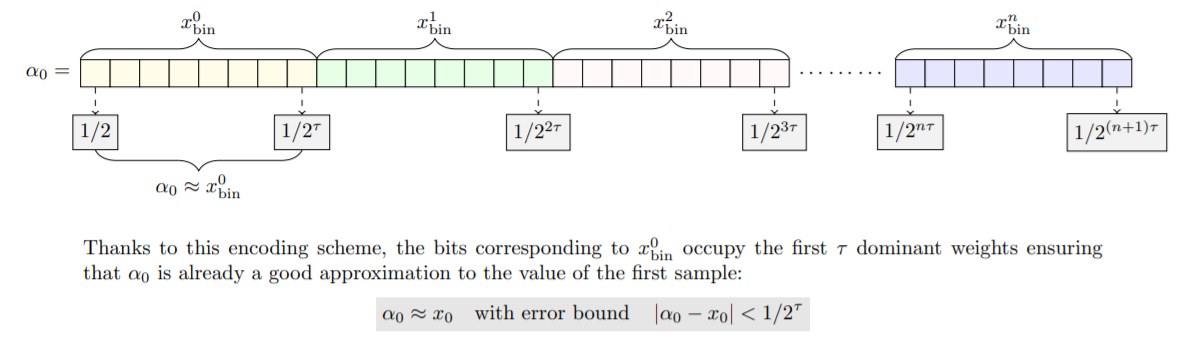

In [3]:
binaryInitial  = ''.join(map(decimalToBinary,xs)) # This is the total value of all decimal numbers in binary

In [4]:
necessaryPrecision  = len(binaryInitial) 
# Let us check the precession as each decimal value is denoted with tau number of binary placed values
# If this is matching with tau* number of decimal values
# assert keyword is used for to check if condition is matched
# Here as it matches we are good to go!
assert tau * len(xs) == necessaryPrecision 

In [5]:
mp.prec = necessaryPrecision
print("In decimal to hold the value we have ",(mp.prec/mp.dps))
print(len(binaryInitial)/(mp.prec/mp.dps))

In decimal to hold the value we have  3.3333333333333335
180.0


In [6]:
binaryToDecimal(binaryInitial)

mpf('0.5487586023016015124002278129500055602490737444757786569089815314132322280608804853415593309202580487262524214263157045215711994873773512510056894677627147625593427578783742017599011')

In [7]:
decimal_initial_str = str(binaryToDecimal(binaryInitial))
print(len(decimal_initial_str))
decimal_initial = binaryToDecimal(binaryInitial)

182


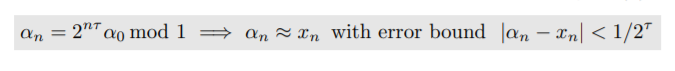

In [8]:
def dyadicDecoder(decimalInitial, k):
    # No we are decoding with this level of significance of tau 
    # These values are decoded values as they have some loss in the original ones
    return (2 ** (k * tau) * decimalInitial) % 1

In [9]:
decoded_values = []
for i in range(len(xs)):
    decoded_values.append(float(dyadicDecoder((decimal_initial),i)))
decoded_values

[0.5487586023016016,
 0.7152350273597948,
 0.6026720657194653,
 0.5447811869298708,
 0.42374166475044095,
 0.6458588178060558,
 0.4377177336047097,
 0.8918368448909552,
 0.9637166733523037,
 0.3834940510360771,
 0.7916330437718069,
 0.5289472893210888,
 0.5680970591796638,
 0.925554399902761,
 0.0708220017089146,
 0.0869189997142281,
 0.02022282947829971,
 0.8327095431156153,
 0.7782886015600406,
 0.8701119899263957,
 0.9787107385168281,
 0.7991849649278202,
 0.46161634435178606,
 0.7805464649157299,
 0.11832029482967785,
 0.6399276223604368,
 0.14354118834911228,
 0.9447074779638874,
 0.5218297400828201,
 0.4146153792310534,
 0.2645933303948312,
 0.7742812972285713,
 0.45619344822796964,
 0.5683639417637054,
 0.018705464137265947,
 0.6175811062413235,
 0.6122111644607755,
 0.6169296313362354,
 0.9437699532199939,
 0.681728389095188,
 0.3594817338898461,
 0.4371820128095993,
 0.6975244681186518,
 0.06022141399750015,
 0.6669117337606292,
 0.6704614835371507,
 0.21023656816925396,
 0.12

In [10]:
normalized_error = []
for i in range(len(xs)):
    normalized_error.append(np.abs(decoded_values[i] - xs[i])/(1/2**tau))# Scaling up with factor 2**tau so that we can see that these values don't cross 1

In [11]:
normalized_error

[0.22487705896219268,
 0.18702740428943798,
 0.374007202523444,
 0.4177758905389055,
 0.35580072565244336,
 0.14456938741886916,
 0.5346195129025091,
 0.26150546995359036,
 0.22082703882006172,
 0.21517193338627294,
 0.3768086972731908,
 0.21450575128301352,
 0.21503215915618057,
 0.1730084450305185,
 0.8767753788307004,
 0.8613887480324252,
 0.018153627541465767,
 0.3674012372061952,
 0.5400600993389162,
 0.4089515195455533,
 0.3784551795265543,
 0.10813731265170645,
 0.5610786769068454,
 0.07081422550800198,
 0.18787926320999304,
 0.02703783081142319,
 0.7696422505098326,
 0.15794550498731041,
 0.07611050906234595,
 0.19071287078986643,
 0.15449411667646018,
 0.19500152567661644,
 0.17660318278080922,
 0.28674910184690816,
 0.3454414810693436,
 0.22278485833157902,
 0.472849360298369,
 0.017881245784337807,
 0.08959879319445463,
 0.3764633939781561,
 0.10717873741782569,
 0.6146417060160729,
 0.43715710407923325,
 0.01662005972860925,
 0.5939950180822962,
 0.7224773878115229,
 0.5979

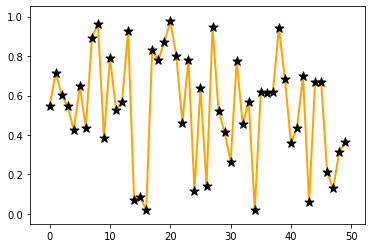

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(numbDataPoints), xs, color='orange', lw=2, zorder=1)
plt.scatter(range(numbDataPoints), decoded_values, color='black', marker='*', s=90, zorder=2);

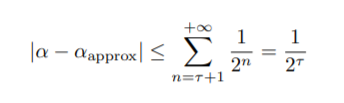

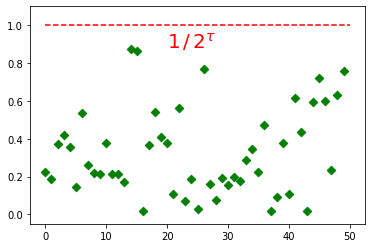

In [13]:
plt.scatter(range(numbDataPoints), normalized_error, color='green', marker='D')
plt.ylim(-0.05,1.1)
plt.hlines(1, 0, 50, color='red', linestyle='dashed')

plt.text(20, 0.88, r'$1 \, / \, 2^\tau$', fontsize=20, color='r');

## Now trying in Logistic Decoder

Here we find a pecular similarity between the logistic map function which states that
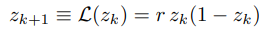

So we can see that if we are able to represent $z_{k}$ in the form of dyadic function then we can have good corelation between them also a point to note is that logistic map will be continuous and smooth for r = 4 value. So we come with a solution of linking the both worlds using the <b>Topological Conjugacy</b>

## Topological Conjugacy


Let us assume that for a given k ∈ N the value zk of an iterate produced by the logistic map can be linked to
some other variable αk through the following change of variable:
$z_{k}$ = φ($α_{k}$) = $sin_{2}$(2π$α_{k}$)

So now we have the following relation

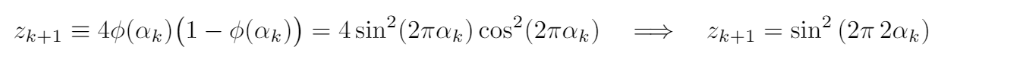

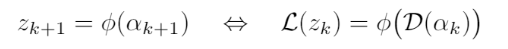

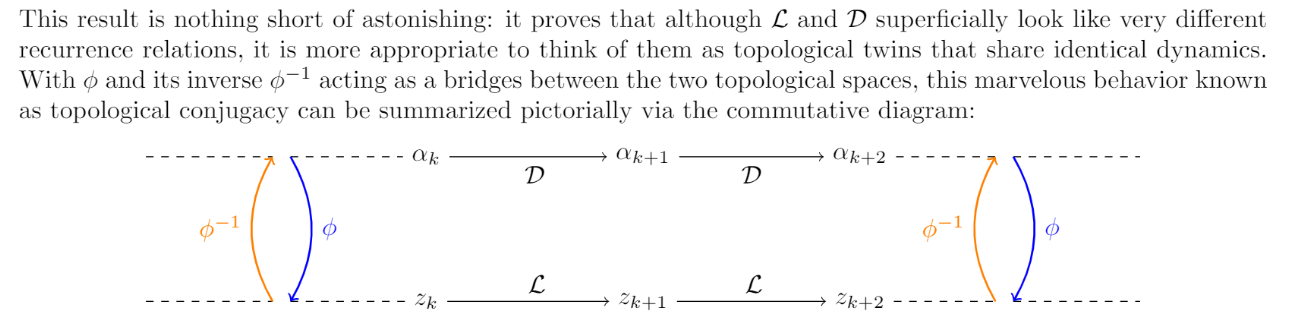

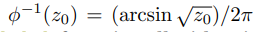

In [20]:
phiInv                 = lambda z: np.arcsin(np.sqrt(z)) / (2.0 * np.pi)
decimalToBinary_phiInv = lambda z: decimalToBinary(phiInv(z))
phi                    = lambda theta: Sin(theta * Pi * 2.0) ** 2

In [15]:
xs

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215,
       0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443,
       0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194,
       0.26455561, 0.77423369, 0.45615033, 0.56843395, 0.0187898 ,
       0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 ,
       0.3595079 , 0.43703195, 0.6976312 , 0.06022547, 0.66676672,
       0.67063787, 0.21038256, 0.1289263 , 0.31542835, 0.36371077])

In [ ]:
def logisticDecoder(decimalInitial, k):
    return float(Sin(2 ** (k * tau) * Asin(Sqrt(decimalInitial))) ** 2)
def findDecodedValues(xs, tau):
    binaryInitial  = ''.join(map(decimalToBinary_phiInv,xs))
    necessaryPrecision  = len(binaryInitial) 
    # Let us check the precession as each decimal value is denoted with tau number of binary placed values
    # If this is matching with tau* number of decimal values
    # assert keyword is used for to check if condition is matched
    # Here as it matches we are good to go!
    assert tau * len(xs) == necessaryPrecision
    mp.prec = necessaryPrecision
    print("In decimal to hold the value we have ",(mp.prec/mp.dps))
    print(len(binaryInitial)/(mp.prec/mp.dps))
    conjugate_initial_str = str(binaryToDecimal(binaryInitial))
    decimal_initial_str = str(phi((binaryToDecimal(binaryInitial))))
    print("The number of digits required to represent in Decimal form of decimal_initial is",len(decimal_initial_str))
    decimal_initial = phi((binaryToDecimal(binaryInitial)))
    print("The decimal Initial value is ",decimal_initial)
    decoded_values = [] # Getting the decoded values using the logisticDecoder function which uses the logic map and dyadic relation
    for i in range(len(xs)):
        decoded_values.append(float(logisticDecoder((decimal_initial),i)))
    return (decoded_values)

In [16]:
binaryInitial  = ''.join(map(decimalToBinary_phiInv,xs))

In [17]:
binaryInitial

'001000011111001010010001001001000011001000011101000111001110001001100000000111010111001100100101001110000010000110110011001011001011001000010010001000101100001101001011000010101111000011000011000001011101001011101101001011000000001100001111001110100000001011010001000111100110001011000010000011100100001001011100000011111101001101100101001000001110000111001000000101100000001010111101000111100011001000101100000001011001001001001101001001001001001001001100001101100011001001111001000110100011000111010110001010000100000010100001001001101110001001110001000100110110000011101111000110000100000110100110'

In [18]:
necessaryPrecision  = len(binaryInitial) 
# Let us check the precession as each decimal value is denoted with tau number of binary placed values
# If this is matching with tau* number of decimal values
# assert keyword is used for to check if condition is matched
# Here as it matches we are good to go!
assert tau * len(xs) == necessaryPrecision 

In [19]:
mp.prec = necessaryPrecision
print("In decimal to hold the value we have ",(mp.prec/mp.dps))
print(len(binaryInitial)/(mp.prec/mp.dps))

In decimal to hold the value we have  3.3333333333333335
180.0


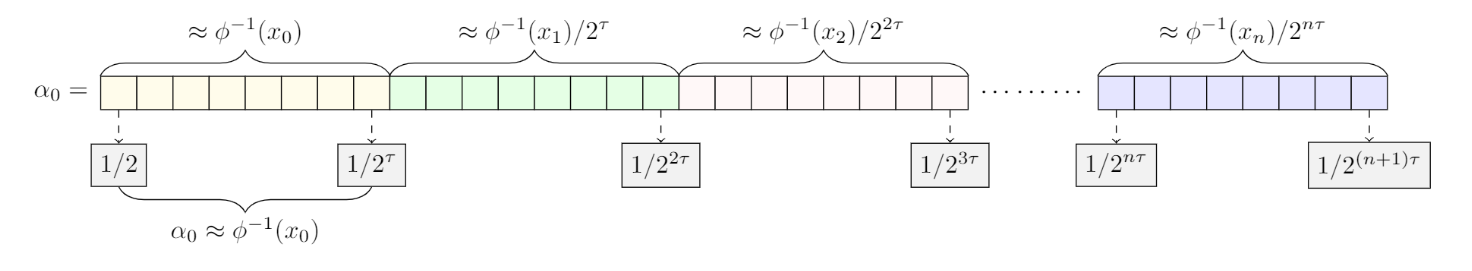

In [26]:
phi(binaryToDecimal(binaryInitial))

mpf('0.547726733767805770526506753364516380432712206683029132121564803535716788818780720271698495069207962332570238123717905284285204499622120978024355024549751030833904000377678385600088437')

In [36]:
conjugate_initial_str = str(binaryToDecimal(binaryInitial))
decimal_initial_str = str(phi((binaryToDecimal(binaryInitial))))
print("The number of digits required to represent in Decimal form of decimal_initial is",len(decimal_initial_str))
decimal_initial = phi((binaryToDecimal(binaryInitial)))

The number of digits required to represent in Decimal form of decimal_initial is 182


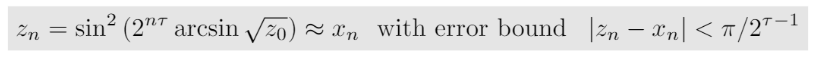

This is the decoding function which will be used as we know the relationship between the logic map and dyadic function by using both the properties the values can be decoded

In [22]:
def logisticDecoder(decimalInitial, k):
    return float(Sin(2 ** (k * tau) * Asin(Sqrt(decimalInitial))) ** 2)

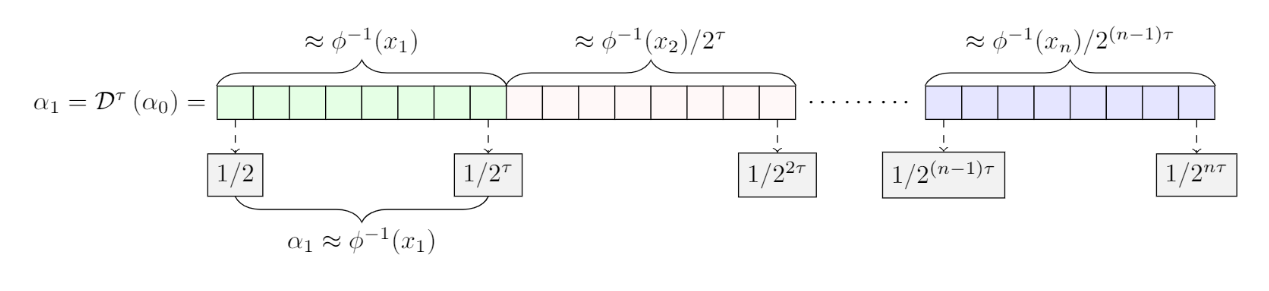

In [27]:
decoded_values = [] # Getting the decoded values using the logisticDecoder function which uses the logic map and dyadic relation
for i in range(len(xs)):
    decoded_values.append(float(logisticDecoder((decimal_initial),i)))
decoded_values

[0.5477267337678058,
 0.7153590003745671,
 0.6022528590524129,
 0.5445991668999459,
 0.4238264843830294,
 0.645311197432205,
 0.437571697425264,
 0.8915345725731939,
 0.9631665396051596,
 0.38323942015272766,
 0.7918155673622632,
 0.5278056052219106,
 0.5676031939779551,
 0.9249054417108442,
 0.07038645175540775,
 0.08685912391831256,
 0.02029328965182908,
 0.8325524716401916,
 0.7780289585783856,
 0.869677801588808,
 0.9785484935149376,
 0.7992262442092549,
 0.4604223686099555,
 0.7804015345199604,
 0.11756205738979258,
 0.6393509195682429,
 0.14343567263279228,
 0.9446143474635735,
 0.521639777085241,
 0.41464900743082056,
 0.2645332333190084,
 0.7740983746953961,
 0.4557806379859385,
 0.5673234353803464,
 0.018582912556906434,
 0.6172340221424664,
 0.6112615874684467,
 0.6158449973301007,
 0.9432210547323635,
 0.6815241231333258,
 0.35943649841493724,
 0.4359901497453632,
 0.6970514894291546,
 0.059875068868346364,
 0.6657740254660427,
 0.6699976482828233,
 0.209665916590952,
 0.128

In [32]:
normalized_error = []
for i in range(len(xs)):
    normalized_error.append(np.abs(decoded_values[i] - xs[i])/(Pi / 2 ** (tau - 1)) )# Scaling up with factor pi/2**tau-1 so that we can see that these values don't cross 1

In [33]:
normalized_error

[mpf('0.708463996486497940445482730772660650573911344485621890372306804379412928804636989409502095036187933876412845255548075247857815808662489241247841510884347960962940780358679190804766727'),
 mpf('0.110584176469028426785318916828376086093496610257862666700627625050833066875352516838755771163338235597915892060849888647533996509287239647866694334718635644212505485775266897089240799'),
 mpf('0.332805354058354091341853727136221060707596896431963670808319536823769833796397022488077879697204714499773105226710139665206858011926622454510029982857298590151224169690218048647121456'),
 mpf('0.185149709301391075329169143155197117582476348113753405618336685095746446185442960003820435370757253194262253214916765101356948125703422411652886851074080042674673736952260406061538295'),
 mpf('0.111921247958602244167830566953926672065445765769204972973830597866701297318668744199157412386433502887716022346097297228089613783540065760431082265266944476822620511602295055430866138'),
 mpf('0.38000191335810685

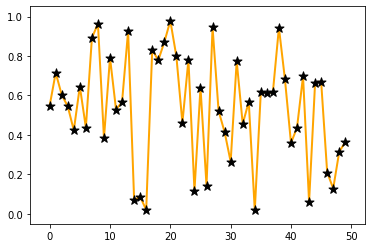

In [34]:
import matplotlib.pyplot as plt

plt.plot(range(numbDataPoints), xs, color='orange', lw=2, zorder=1)
plt.scatter(range(numbDataPoints), decoded_values, color='black', marker='*', s=90, zorder=2);

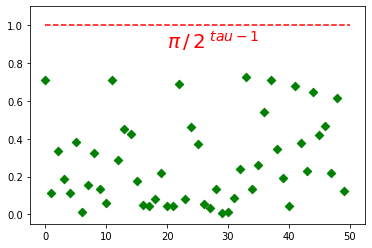

In [37]:
plt.scatter(range(numbDataPoints), normalized_error, color='green', marker='D')
plt.ylim(-0.05,1.1)
plt.hlines(1, 0, 50, color='red', linestyle='dashed')

plt.text(20, 0.88, '$\pi \, / \, 2^{\ tau - 1}$', fontsize=20, color='r');

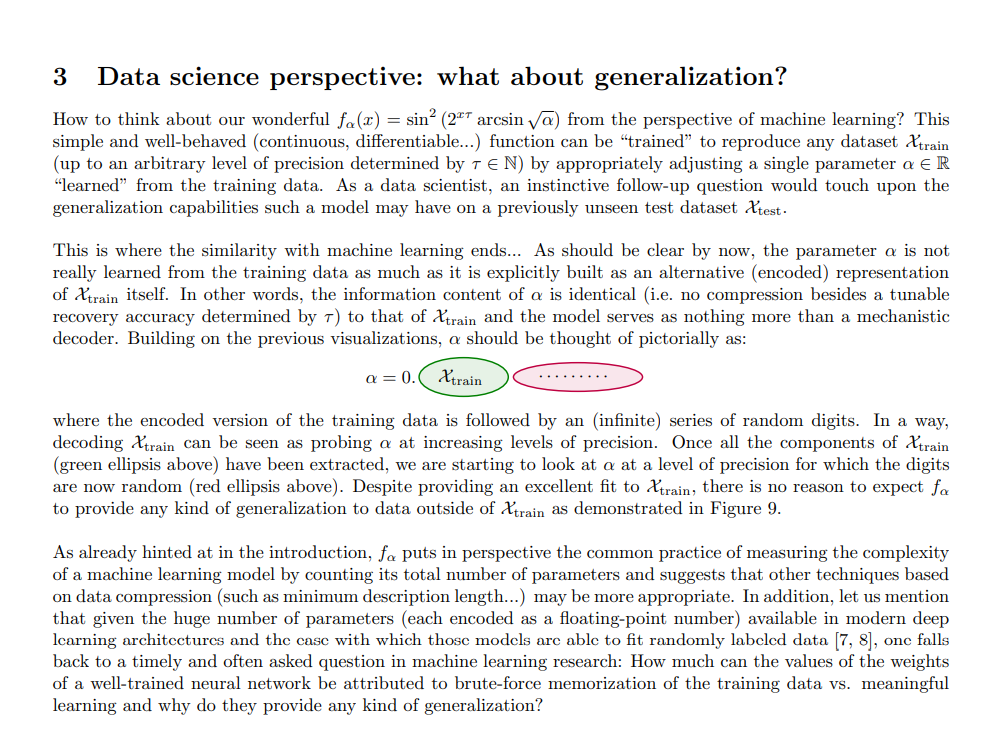

## Let's try out...

Here we have taken an image and we will try to encode it and decode it. This helps us to save lot of data to be stored for each pixel. We can easily train models quickly. Also the data can be decoded with certain limitation of loss due to representation of floating point numbers as discussed previously in the whole context of discussion.

In [71]:
from PIL import Image

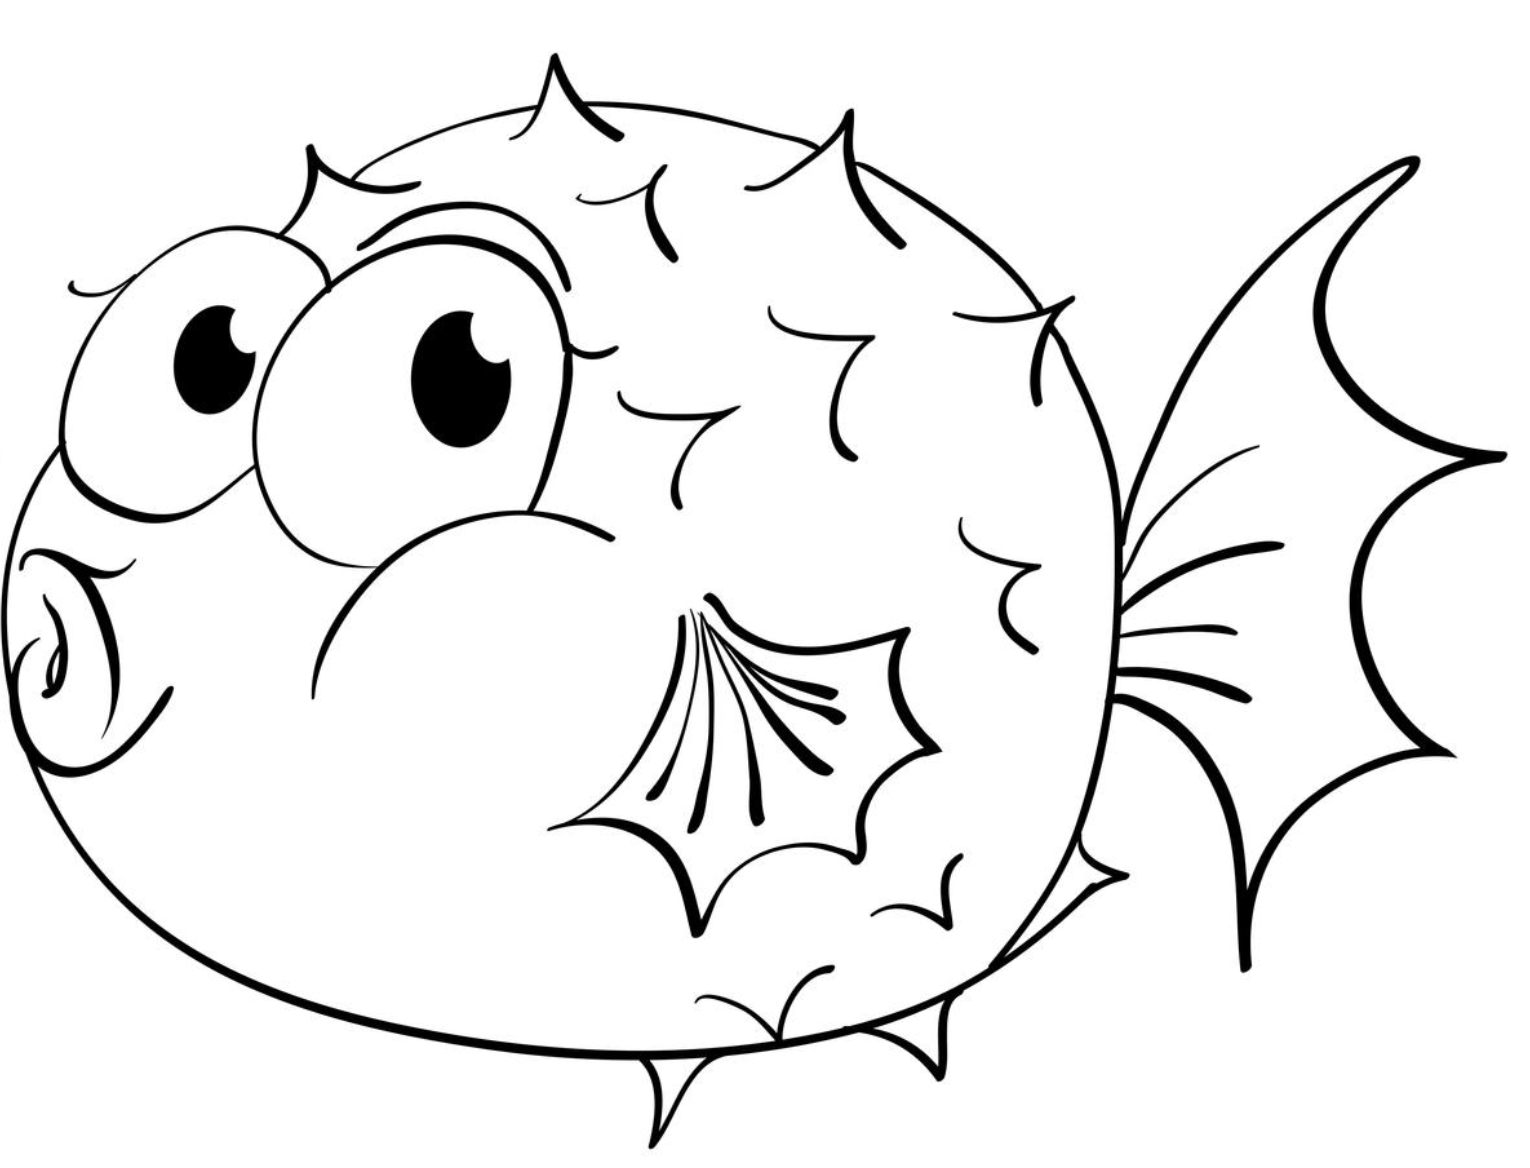

In [140]:
originalImage = Image.open('fish.png')
originalImage

#### PIL is image processing library in python

Here we are converting the given image to greyscale so that we can identify and store only luminous area. From the given image we first get greyscale image using <b>.convert('L')</b> this will store only the luminous areas. We want outline so the returned matrix will be given to lambda function which will change the values to be inverse that means contour of the figure will be white and remaining as black. So our matrix now has all non luminous area pooints according to the figure.

(1530, 1168)


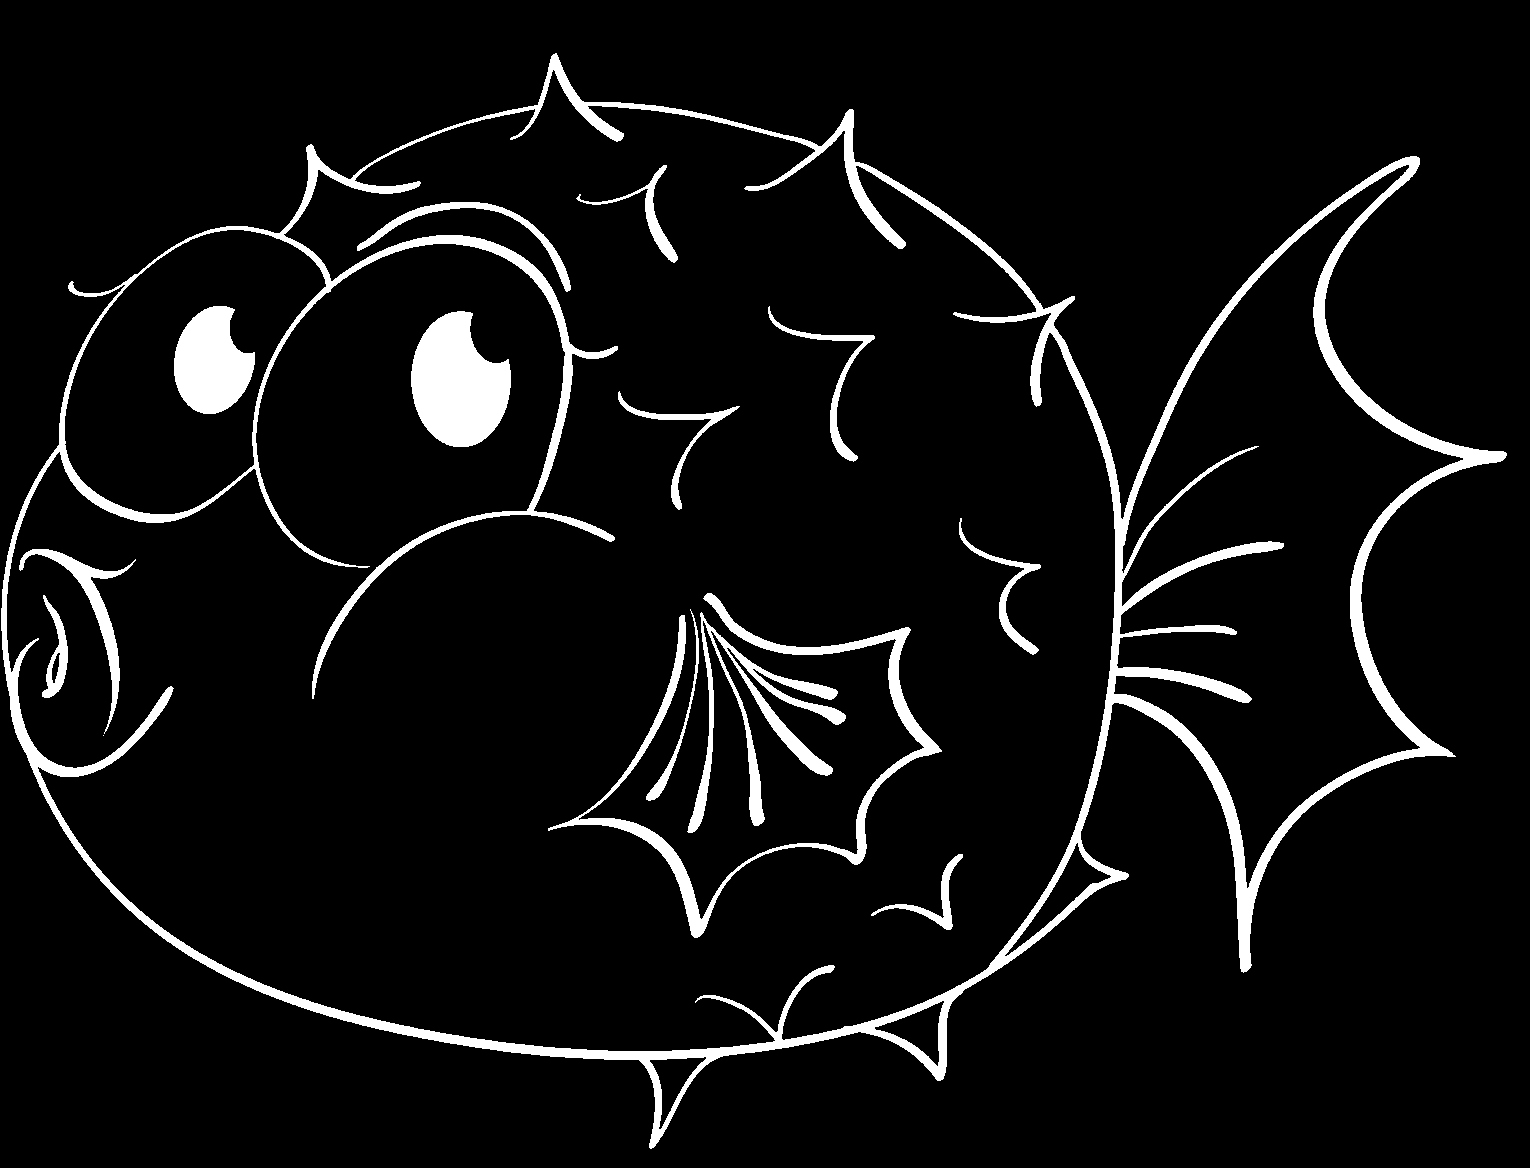

In [141]:
import numpy as np

image = originalImage.convert('L').point(lambda x : 0 if x > 100 else 255).convert('1')

img = np.rot90(np.asarray(image), k=3)
# Now np.rot90 means that we are rotating the given array by 90degrees 
# k denotes number of times it has to be rotated

print(img.shape)
width, height = img.shape
possiblePositions = list(zip(*np.where(img))) # Return elements chosen from x or y depending on condition

image

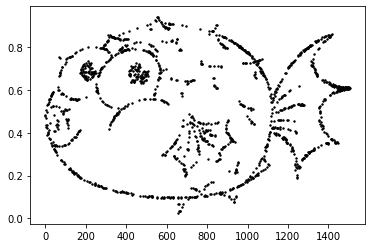

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

sampleAndScale = lambda gr: gr['y'].sample().values[0] / height # scaling down the height values using the actual height of the matrix

data = pd.DataFrame(possiblePositions, columns=['x', 'y']).groupby('x').apply(sampleAndScale)
data = data.reindex(np.arange(0, width), fill_value=-10)

data = data[data > 0]# If the data value of height is less than 0 we are removing those points
numbPoints = len(data)
data.index = range(numbPoints)

plt.scatter(range(numbPoints), data, color='k', s=2)# Plotting using matplotlib

In [143]:
data# The data has index as width values and height as succeding column with normalized floating points

0       0.476884
1       0.481164
2       0.434932
3       0.505137
4       0.425514
          ...   
1501    0.612158
1502    0.608733
1503    0.611301
1504    0.609589
1505    0.611301
Length: 1506, dtype: float64

### Made all previous followed code snippets to one function so that we can avoid redundancy in writing the lengthy code

In [144]:
from helper_functions import *
decimal_initial = findInitialCondition(data)

significance = 18072 bits ; 5439 digits (base-10) ; ratio = 3.323



In [145]:
decimal_initial

mpf('0.475652861291144175279439686515079972760324952932778588380137503354310180643575575024103594378608596043872348071448397373719742581011158633716587996004713699383578396143614223827542820980425693661328176040797297035838079729558552888647282757701294373857521946411178011174878142299140334230129843170134281512372950364208673223134399860033712666087998862032774219559871817052541898842227000078881479241925048184809653378732836663596208552473149871835531480556150474521958419660952869269517134455618723480719071396384341514989867788535489774040972258924798200741074260000474100385238028495409432131212613312308183474456422150270079147717634494685470021147269185558955594099428049095445136689029856332042244416168268581178339913591055276979455923111662807855674481255591614227120006082461282665240295274339367601635819305629603638357600344304153236330400502652564345570429082431941608299052858326342499628255332218526496703122272083114231035906929437297759801099232950536353787759593772786026251148

In [146]:
decoded_values = generateData(decimal_initial, len(data))

In [147]:
decoded_values

[mpf('0.475652861291144202215974701175582595169544219970703125'),
 mpf('0.4802390886109202394749218001379631459712982177734375'),
 mpf('0.4344212278329653287300970987416803836822509765625'),
 mpf('0.50477565106676980377642394159920513629913330078125'),
 mpf('0.426675509215605430757278782039065845310688018798828125'),
 mpf('0.0281982027624640245455633902338377083651721477508544921875'),
 mpf('0.003926031290225021931628024418614586465992033481597900390625'),
 mpf('0.5095924098130424351182909958879463374614715576171875'),
 mpf('0.99947049454002723223311477340757846832275390625'),
 mpf('0.0001832515102516632933375706482337363922852091491222381591796875'),
 mpf('0.7936434398628884334669919553562067449092864990234375'),
 mpf('0.34103351912246615551538297950173728168010711669921875'),
 mpf('0.060569768949697240512097806686142575927078723907470703125'),
 mpf('0.367873527611844775009330987813882529735565185546875'),
 mpf('0.7592823683965146397412127043935470283031463623046875'),
 mpf('0.8980677

In [148]:
normalized_error = []
for i in range(len(data)):
    normalized_error.append(np.abs(decoded_values[i] - data[i])/(Pi / 2 ** (tau - 1)) )# Scaling up with factor pi/2**tau-1 so that we can see that these values don't cross 1

In [149]:
sum(normalized_error)

mpf('344344.9254042668477308113532890464667765907934979784706580601443843738997274642874917903410686729139179175361666537007559824214371196327708197357486134997824712465343767584718888046987764602712671223989655212710536952403598756781789724179033008286760487700905699599152205974883563602230286319063263556583397585373852743930845841756627006477884275118699398740330287458291447745460335356682840345081001912035316175726654895763326096798184155759656525749072209348021446574063696636921595743415299920259356600891921190668262424197881448881982034566236607338818690947561896316969092590955514031300429871571897568113163933047509834637627362372979701718379674208184887927657402882064650312780286746878508238943679256552492416398403344508911622188336957522380170620838430426551659052063379511003939546355649654479524993516478495702042884665319011114117406483334316975425156365552091459752435384495834111222703533270618117481521420189135327382121433428352596182928432797241162677022280129033288621412852

In [150]:
count = 0
for i in decoded_values:
    if i == 0.0:
        count += 1
print(count)
print(len(data))
print(len(data)-count)

0
1506
1506


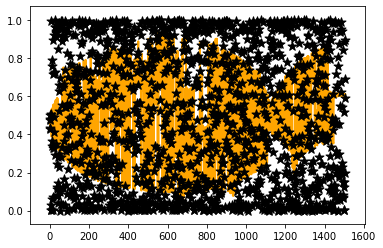

In [151]:
import matplotlib.pyplot as plt

plt.plot(range(len(data)), data, color='orange', lw=2, zorder=1)
plt.scatter(range(len(data)), decoded_values, color='black', marker='*', s=90, zorder=2);

In [211]:
# filtering out the data with limitation over the error 
filtered_values = []
for i in range(len(data)):
    if np.abs(decoded_values[i] - data[i]) <= 0.20:
        filtered_values.append(data[i])

In [212]:
len(filtered_values)

482

In [213]:
len(data)

1506

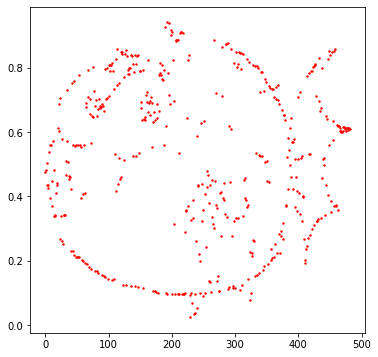

In [214]:
plt.figure(figsize=(6,6))
# darkgreen ; darkblue ; darkorange ; red
plt.scatter(range(len(filtered_values)), filtered_values, color='red',s=2)
plt.axis('on');

## Application over real Dataset

Here let us apply over the famous <b>Iris Dataset</b>. The dataset has 4 data columns and 1 target column. Below we have loaded the dataset. The dataset can be encoded into single parameter so that we can achieve faster rates for fitting the data in the model. The below shows the encoding and decoding of the data.

In [25]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

In [26]:
iris = datasets.load_iris()# Loading the dataset 

In [27]:
X = iris.data# X values only

In [225]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [228]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)# Scaling to convert whole into floating points

In [229]:
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [230]:
decimal_initial = findInitialCondition(X_scaled[0])# Let us try over first row

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692



In [231]:
decimal_initial

mpf('0.2223998903649234')

In [234]:
decoded_values = generateData(decimal_initial, len(X_scaled[0]))

In [235]:
decoded_values# It worked !

[mpf('0.2223998903649234'),
 mpf('0.6245258385478681'),
 mpf('0.06726831708054559'),
 mpf('0.04162957684760361')]

### Dataset encoding and decoding

In [241]:
X_decode = []
X_single_parameter = []
for i in X_scaled:
    decimal_initial = findInitialCondition(i)
    X_single_parameter.append(decimal_initial)
    decoded_values = generateData(decimal_initial, len(i))
    X_decode.append(decoded_values)

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

signific

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

signific

In [243]:
X_single_parameter# Encoded Dataset which has only one parameter

[mpf('0.2223998903649234'),
 mpf('0.1666275864636821'),
 mpf('0.1107120549643228'),
 mpf('0.08266837638863223'),
 mpf('0.1937790832854605'),
 mpf('0.3046612911126623'),
 mpf('0.0826852897442425'),
 mpf('0.1937625060671966'),
 mpf('0.02775034223565587'),
 mpf('0.1666351240622479'),
 mpf('0.3046395693372776'),
 mpf('0.1380226669559477'),
 mpf('0.1379945051871649'),
 mpf('2.929488393426342e-8'),
 mpf('0.4163073984157837'),
 mpf('0.3878317489724363'),
 mpf('0.3046612842952108'),
 mpf('0.2223998903659643'),
 mpf('0.3877069391178871'),
 mpf('0.2224273031369162'),
 mpf('0.3046099254600385'),
 mpf('0.2224179582838595'),
 mpf('0.08269683334179945'),
 mpf('0.2223827634068023'),
 mpf('0.1380226701096685'),
 mpf('0.1937302396596978'),
 mpf('0.1937625074422282'),
 mpf('0.2497498883916176'),
 mpf('0.2497408085020565'),
 mpf('0.1107120585791637'),
 mpf('0.1380014827127383'),
 mpf('0.3046099223481153'),
 mpf('0.2498127905583818'),
 mpf('0.3332942707477216'),
 mpf('0.1666351240644772'),
 mpf('0.1937465

In [244]:
X_decode# Decoded dataset has same as usual parameter values

[[mpf('0.2223998903649234'),
  mpf('0.6245258385478681'),
  mpf('0.06726831708054559'),
  mpf('0.04162957684760361')],
 [mpf('0.1666275864636822'),
  mpf('0.4160939964493343'),
  mpf('0.06726833813220166'),
  mpf('0.04169836311347423')],
 [mpf('0.1107120549643228'),
  mpf('0.5000554392938527'),
  mpf('0.05068478421449971'),
  mpf('0.04167280775593754')],
 [mpf('0.08266837638863223'),
  mpf('0.4571729966870323'),
  mpf('0.0842930822654932'),
  mpf('0.04167702299184521')],
 [mpf('0.1937790832854605'),
  mpf('0.6656135914732529'),
  mpf('0.06726833475071685'),
  mpf('0.04168731045435965')],
 [mpf('0.3046612911126622'),
  mpf('0.7917239999616569'),
  mpf('0.1184626972376453'),
  mpf('0.1245452908316061')],
 [mpf('0.0826852897442425'),
  mpf('0.5825197405652687'),
  mpf('0.06727883370619646'),
  mpf('0.08256946725370559')],
 [mpf('0.1937625060671966'),
  mpf('0.5825274923062163'),
  mpf('0.08429308094625448'),
  mpf('0.04167313608860507')],
 [mpf('0.02775034223565587'),
  mpf('0.37411307945

In [9]:
from PIL import Image
import numpy as np
from helper_functions import *

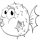

In [42]:
originalImage = Image.open('fish.png')
originalImage = originalImage.resize((40,40))
originalImage

In [43]:
image_sequence = originalImage.getdata()

In [44]:
image_array = np.array(image_sequence)

In [45]:
image_array

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]])

In [46]:
scaler = MinMaxScaler()
scaler.fit(image_array)
image_array_scaled = scaler.transform(image_array)

In [47]:
image_array_scaled

array([[1., 1., 1., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 0.],
       ...,
       [1., 1., 1., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 0.]])

In [48]:
image_decode = []
image_single_parameter = []
for i in image_array_scaled:
    decimal_initial = findInitialCondition(i)
    image_single_parameter.append(decimal_initial)
    decoded_values = generateData(decimal_initial, len(i))
    image_decode.append(decoded_values)

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

signific

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

signific

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

signific

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

signific

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

signific

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

signific

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

signific

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

signific

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

signific

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

signific

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

signific

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

signific

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692

significance = 48 bits ; 13 digits (base-10) ; ratio = 3.692



In [49]:
image_single_parameter

[mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.9999998528596237'),
 mpf('0.999999852859

In [50]:
image_decode

[[mpf('0.9999998528596238'),
  mpf('0.9999998529405673'),
  mpf('0.9999999976246794'),
  mpf('0.03932469783965118')],
 [mpf('0.9999998528596238'),
  mpf('0.9999998529405673'),
  mpf('0.9999999976246794'),
  mpf('0.03932469783965118')],
 [mpf('0.9999998528596238'),
  mpf('0.9999998529405673'),
  mpf('0.9999999976246794'),
  mpf('0.03932469783965118')],
 [mpf('0.9999998528596238'),
  mpf('0.9999998529405673'),
  mpf('0.9999999976246794'),
  mpf('0.03932469783965118')],
 [mpf('0.9999998528596238'),
  mpf('0.9999998529405673'),
  mpf('0.9999999976246794'),
  mpf('0.03932469783965118')],
 [mpf('0.9999998528596238'),
  mpf('0.9999998529405673'),
  mpf('0.9999999976246794'),
  mpf('0.03932469783965118')],
 [mpf('0.9999998528596238'),
  mpf('0.9999998529405673'),
  mpf('0.9999999976246794'),
  mpf('0.03932469783965118')],
 [mpf('0.9999998528596238'),
  mpf('0.9999998529405673'),
  mpf('0.9999999976246794'),
  mpf('0.03932469783965118')],
 [mpf('0.9999998528596238'),
  mpf('0.9999998529405673')

In [63]:
image_inv = scaler.inverse_transform(image_decode)
image_inv

array([[254.99996248, 254.9999625 , 254.99999939, 255.0393247 ],
       [254.99996248, 254.9999625 , 254.99999939, 255.0393247 ],
       [254.99996248, 254.9999625 , 254.99999939, 255.0393247 ],
       ...,
       [254.99996248, 254.9999625 , 254.99999939, 255.0393247 ],
       [254.99996248, 254.9999625 , 254.99999939, 255.0393247 ],
       [254.99996248, 254.9999625 , 254.99999939, 255.0393247 ]])

In [64]:
import math
for i in range(len(image_inv)):
    for j in range (len(image_inv[0])):
        image_inv[i][j] = math.floor(image_inv[i][j])

In [65]:
image_inv

array([[254., 254., 254., 255.],
       [254., 254., 254., 255.],
       [254., 254., 254., 255.],
       ...,
       [254., 254., 254., 255.],
       [254., 254., 254., 255.],
       [254., 254., 254., 255.]])

In [71]:
decoded_image = Image.fromarray(image_array)
decoded_image = decoded_image.convert('L')

In [74]:
decoded_image.save("output1.png")

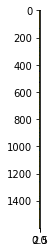

In [76]:
from matplotlib import pyplot as plt
plt.imshow(image_array, interpolation='nearest')
plt.show()

In [77]:
from scipy.misc import toimage
toimage(image_Array).show()

ImportError: cannot import name 'toimage' from 'scipy.misc' (C:\Users\hp\anaconda3\lib\site-packages\scipy\misc\__init__.py)